<a href="https://colab.research.google.com/github/MartinSantaGitHub/curso-series-temporales/blob/master/Tareas/tarea_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing the Data and Pre-processing 

In [2]:
raw_csv_data = pd.read_csv("https://raw.githubusercontent.com/MartinSantaGitHub/curso-series-temporales/master/6.%20Modelos%20MA%20medias%20m%C3%B3viles/Python/Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value']=df_comp.ftse 

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## LLR Test

In [5]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

## The DF-Test

In [6]:
sts.adfuller(df.market_value)

(-1.9041551418836857,
 0.3301089327702835,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '10%': -2.5670769326348926,
  '5%': -2.8621166146845334},
 54854.15304507557)

## Using Returns

In [7]:
df['returns'] = df.market_value.pct_change(1).mul(100)
df2 = df.iloc[1:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
sts.adfuller(df2.returns)

(-12.770265719497248,
 7.798058336037938e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '10%': -2.5670785949998973,
  '5%': -2.8621197374408225},
 15696.7672456975)

## ACF and PACF for Returns

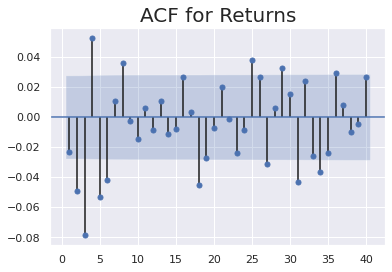

In [9]:
sgt.plot_acf(df2.returns, zero = False, lags = 40)
plt.title("ACF for Returns", size = 20)
plt.show()

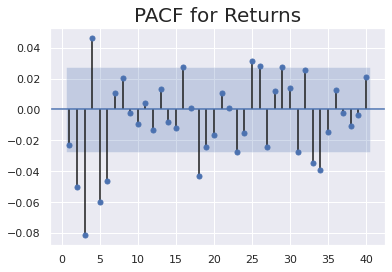

In [10]:
sgt.plot_pacf(df2.returns, lags = 40, zero = False, method = ('ols'))
plt.title("PACF for Returns", size = 20)
plt.show()

## AR(1) for Returns

In [11]:
model_ar = ARMA(df2.returns, order=(1,0))
results_ar = model_ar.fit()
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.749
Method:                       css-mle   S.D. of innovations              1.174
Date:                Wed, 21 Apr 2021   AIC                          15865.497
Time:                        22:57:16   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.159      0.247      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4386           +0.0000j           43.4386            0.5000
-----------------------------------------------------------------------------
"""

## Higher-Lag AR Models for Returns

In [16]:
model_ar_2 = ARMA(df2.returns, order=[2,0])
results_ar_2 = model_ar_2.fit()
print(results_ar_2.summary()) 
print ("LLR test: " + str(LLR_test(results_ar, results_ar_2)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -7923.456
Method:                       css-mle   S.D. of innovations              1.173
Date:                Wed, 21 Apr 2021   AIC                          15854.911
Time:                        23:05:52   BIC                          15880.996
Sample:                    01-10-1994   HQIC                         15864.052
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.220      0.222      -0.011       0.049
ar.L1.returns    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.returns    -0.0500      0.014     

In [17]:
model_ar_3 = ARMA(df2.returns, order=[3,0])
results_ar_3 = model_ar_3.fit()
print(results_ar_3.summary()) 
print ("LLR test: " + str(LLR_test(results_ar_2, results_ar_3)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood               -7906.738
Method:                       css-mle   S.D. of innovations              1.169
Date:                Wed, 21 Apr 2021   AIC                          15823.477
Time:                        23:09:06   BIC                          15856.083
Sample:                    01-10-1994   HQIC                         15834.902
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.330      0.184      -0.009       0.047
ar.L1.returns    -0.0283      0.014     -2.011      0.044      -0.056      -0.001
ar.L2.returns    -0.0521      0.014     

In [18]:
model_ar_4 = ARMA(df2.returns, order=[4,0])
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary()) 
print ("LLR test: " + str(LLR_test(results_ar_3, results_ar_4)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(4, 0)   Log Likelihood               -7901.330
Method:                       css-mle   S.D. of innovations              1.168
Date:                Wed, 21 Apr 2021   AIC                          15814.661
Time:                        23:09:17   BIC                          15853.788
Sample:                    01-10-1994   HQIC                         15828.371
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.267      0.205      -0.010       0.048
ar.L1.returns    -0.0245      0.014     -1.739      0.082      -0.052       0.003
ar.L2.returns    -0.0496      0.014     

In [19]:
model_ar_5 = ARMA(df2.returns, order=[5,0])
results_ar_5 = model_ar_5.fit()
print(results_ar_5.summary()) 
print ("LLR test: " + str(LLR_test(results_ar_4, results_ar_5)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 0)   Log Likelihood               -7892.390
Method:                       css-mle   S.D. of innovations              1.166
Date:                Wed, 21 Apr 2021   AIC                          15798.779
Time:                        23:09:32   BIC                          15844.428
Sample:                    01-10-1994   HQIC                         15814.775
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.348      0.178      -0.009       0.046
ar.L1.returns    -0.0217      0.014     -1.544      0.123      -0.049       0.006
ar.L2.returns    -0.0544      0.014     

In [20]:
model_ar_6 = ARMA(df2.returns, order=[6,0])
results_ar_6 = model_ar_6.fit()
print(results_ar_6.summary()) 
print ("LLR test: " + str(LLR_test(results_ar_5, results_ar_6)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(6, 0)   Log Likelihood               -7886.945
Method:                       css-mle   S.D. of innovations              1.164
Date:                Wed, 21 Apr 2021   AIC                          15789.890
Time:                        23:09:41   BIC                          15842.059
Sample:                    01-10-1994   HQIC                         15808.170
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.414      0.157      -0.007       0.045
ar.L1.returns    -0.0245      0.014     -1.740      0.082      -0.052       0.003
ar.L2.returns    -0.0523      0.014     

In [21]:
model_ar_7 = ARMA(df2.returns, order=[7,0])
results_ar_7 = model_ar_7.fit()
print(results_ar_7.summary()) 
print ("LLR test: " + str(LLR_test(results_ar_6, results_ar_7)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood               -7886.647
Method:                       css-mle   S.D. of innovations              1.164
Date:                Wed, 21 Apr 2021   AIC                          15791.294
Time:                        23:09:57   BIC                          15849.985
Sample:                    01-10-1994   HQIC                         15811.860
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.399      0.162      -0.008       0.045
ar.L1.returns    -0.0240      0.014     -1.702      0.089      -0.052       0.004
ar.L2.returns    -0.0517      0.014     

In [22]:
print(f"LLR test: {str(LLR_test(results_ar, results_ar_6, DF = 5))}")

LLR test: 0.0


## Analysing the Residuals of the Returns for the model AR(1)

In [12]:
df2['res_returns'] = results_ar.resid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
sts.adfuller(df2.res_returns)

(-12.7827899599728,
 7.354232414325527e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '10%': -2.5670785949998973,
  '5%': -2.8621197374408225},
 15696.449407720838)

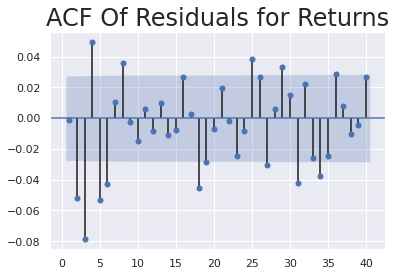

In [14]:
sgt.plot_acf(df2.res_returns, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

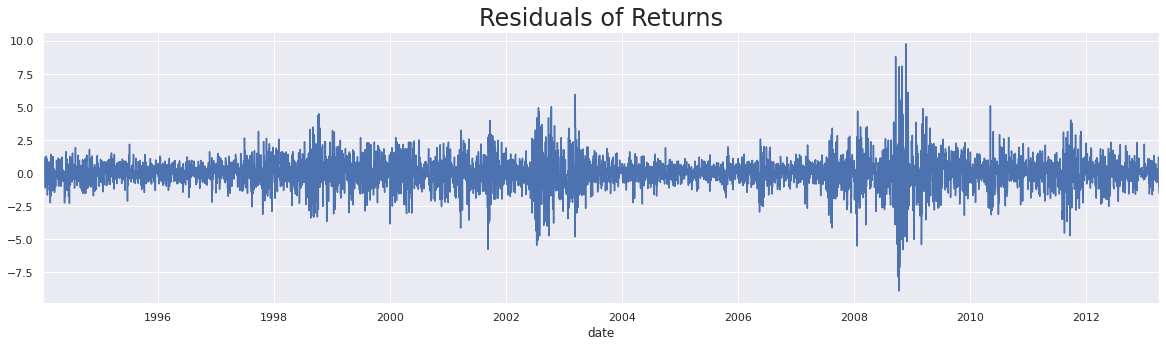

In [15]:
df2.res_returns[1:].plot(figsize=(20,5))
plt.title("Residuals of Returns",size=24)
plt.show()

## Analysing the Residuals of the Returns for the model AR(6)

In [23]:
df2['res_returns_7'] = results_ar_7.resid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
sts.adfuller(df2.res_returns_7)

(-70.83549059895073,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '10%': -2.567076626752987,
  '5%': -2.8621160400844468},
 15691.957447341107)

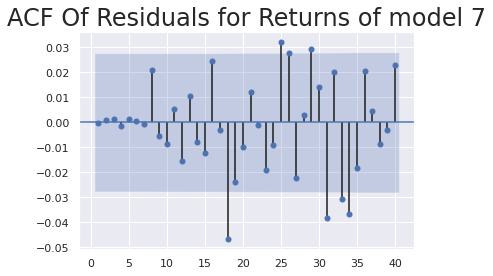

In [28]:
sgt.plot_acf(df2.res_returns_7, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns of model 7",size=24)
plt.show()

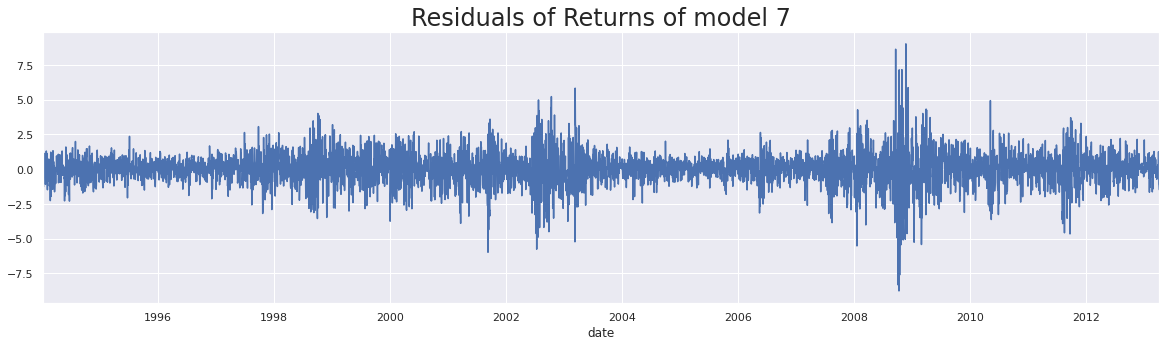

In [26]:
df2.res_returns_7[1:].plot(figsize=(20,5))
plt.title("Residuals of Returns of model 7",size=24)
plt.show()